In [10]:
from datetime import datetime
current_date = datetime.today()
print(current_date.isoformat())

2022-09-15T13:33:41.895627


In [35]:
from random import choices

def generate_unique_ids(n):
    ids = []
    for i in range(n):
        rdm_id = np.random.randint(1000,10000)
        while rdm_id in ids:
            rdm_id = np.random.randint(10,1000)
        ids.append(rdm_id)
    ids = np.sort(ids)
    return ids


import numpy as np
import pandas as pd
p = 0.7
N = np.random.randint(7,70)
n_prj = np.random.binomial(N*.3,p)
n_utl = np.random.binomial(N,p)
n_tsk = 2 + np.random.binomial(N*3,p)
n_cmp = np.random.binomial(N*.4,p)

# genere des ids unique pour chaque variable
ids_utl = generate_unique_ids(n_utl)
ids_cmp = generate_unique_ids(n_cmp)
ids_tsk = generate_unique_ids(n_tsk)
ids_prj = generate_unique_ids(n_prj)

mat_cmp = np.zeros((n_cmp, n_utl))
for i in range(n_utl):
    proba = min(np.random.exponential(.20),1)
    mat_cmp[:,i] = np.random.binomial(3,proba,n_cmp)

df_cmp = pd.DataFrame({'emc_sfkarticle':[],'emc_sniveau':[],'emc_sfkutilisateur':[]})
for cmp in range(n_cmp):
    for utl in range(n_utl):
        if mat_cmp[cmp,utl] > 0:
            df_cmp = df_cmp.append({'emc_sfkarticle':ids_cmp[cmp],
                           'emc_sniveau':mat_cmp[cmp,utl],
                           'emc_sfkutilisateur':ids_utl[utl]},ignore_index=True)
df_cmp = df_cmp.astype(int)

mat_prj = np.random.randint(0,2,(n_prj, n_utl))
df_prj = pd.DataFrame({'utl_spkutilisateur':[],'int_sfkprojet':[],})
for prj in range(n_prj):
    for utl in range(n_utl):
        if mat_prj[prj,utl] > 0:
            df_prj = df_prj.append({'utl_spkutilisateur':ids_utl[utl],
                           'int_sfkprojet':ids_prj[prj],},ignore_index=True)
df_prj = df_prj.astype(int)

df_tsk = pd.DataFrame({'evt_dduree':[],'evt_spkevenement':[],'lgl_sfkligneparent':[],'evt_sfkprojet':[],})
for i, tsk in enumerate(ids_tsk):
    p = np.random.uniform(0.1,.4)
    duree = np.random.binomial(50,p) / 4

    df_tsk = df_tsk.append({'evt_dduree':duree,
                            'evt_spkevenement':tsk,
                   'lgl_sfkligneparent':choices(ids_cmp)[0],
                            'evt_sfkprojet':choices(ids_prj)[0],
                           },ignore_index=True)

for key in df_tsk.columns[1:]: df_tsk[key] = df_tsk[key].astype(int)

np_ = np.round(df_tsk['evt_dduree'].sum()/ n_utl,2) * np.random.uniform(0.8,1.2)

df_dsp = pd.DataFrame({'utl_spkutilisateur':[],'utl_sdispo':[],})
for utl in range(n_utl):
    p = np.random.uniform(0.1,.9)
    n = np_/p 
    dispo=np.random.binomial(n,p)
    df_dsp = df_dsp.append({'utl_spkutilisateur':ids_utl[utl],
                   'utl_sdispo':dispo,},ignore_index=True)
df_dsp = df_dsp.astype(int)

    

In [45]:
def make_mat_spe(mat_cmp):
    """
    la matrice de spécialisation permet de mettre en avant le fait que certaines personnes ne
    savent réaliser qu'un nombre limité de tâches, a un niveau de compétence peut-être inférieur à d'autmat_spe personnes plus expertes, mais étant donné
    qu'elle ne savent faire que ces tâches, il vaut mieux leur assigner à eux et laisser le champ libre à des personnes plus expertes, souvent plus transverses (chef d'équipe etc).
    """
    mat_spe = mat_cmp.astype(float)
    mat_spe[:,mat_cmp.sum(axis=0)==0] = np.nan
    mat_spe = mat_spe/mat_spe.sum(axis=0) * 3
    mat_spe[mat_spe == np.nan] =0
    mat_spe[:,mat_cmp.max(axis=0)==0]=0
    return mat_spe


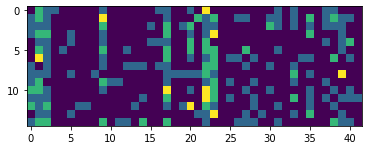

In [46]:
mat_spe = make_mat_spe(mat_cmp)
plt.imshow(mat_cmp)

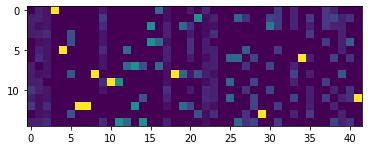

In [47]:
import matplotlib.pyplot as plt
plt.imshow(mat_spe)